# Weston EDA - Rotten Tomatoes Data

## Importing Pandas, Matplotlib, Seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Finding the Rotton Tomatoes Data in the 'data' directory

In [2]:
!ls

README.md        Weston-EDA.ipynb data


In [3]:
!ls data

bom.movie_gross.csv       imdb.title.crew.csv       rt.reviews.tsv
imdb.name.basics.csv      imdb.title.principals.csv tmdb.movies.csv
imdb.title.akas.csv       imdb.title.ratings.csv    tn.movie_budgets.csv
imdb.title.basics.csv     rt.movie_info.tsv


## Loading the Review and Info TSV files

In [4]:
df_rt_info = pd.read_csv('./data/rt.movie_info.tsv', delimiter='\t')

In [5]:
df_rt_review = pd.read_csv('./data/rt.reviews.tsv', delimiter='\t', encoding='latin1')

## Inspecting both TSV files (info & reviews)

In [6]:
df_rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
df_rt_review.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [8]:
df_rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [9]:
df_rt_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


## At a glance:

It seems that the df_rt_info data is small. The currency, box office and studio columns have many null values. 
All of the columns are objects(strings) except for the id. 

I am most interested in the runtime columns, maybe there is some trends over history.

The df_rt_review data is much larger, containing many reviews of the films with corresponding id numbers. It seems there are no actual titles to the films in either datasets. The dataset is also missing around 10,000 ratings. 

I am most interested in the publisher column to see who is most active on Rotten Tomatoes. 

---

## Inspecting the Runtime on df_rt_info
Let's figure out what years the data set covers.
Let's also figure out some descriptive statistics of the runtime.

In [10]:
# inspecting the years in the data
inspect_years = df_rt_info['theater_date'].str[-4:].unique()
inspect_years

array(['1971', '2012', '1996', '1994', nan, '2000', '2002', '2006',
       '2010', '1995', '1968', '1997', '2013', '1987', '2004', '1966',
       '1981', '1999', '1970', '2007', '2003', '1967', '1984', '1998',
       '2014', '1940', '1986', '1965', '2011', '2001', '1939', '2016',
       '1992', '1946', '1989', '1993', '1990', '2008', '2018', '1973',
       '1978', '1937', '1951', '1958', '2009', '1943', '1945', '1942',
       '1991', '1988', '1983', '1963', '2005', '1980', '2017', '1944',
       '1985', '1922', '1950', '1933', '1957', '1962', '1934', '1932',
       '2015', '1979', '1960', '1964', '1982', '1956', '1953', '1947',
       '1948', '1955', '1977', '1941', '1976', '1930', '1974', '1972',
       '1949', '1952', '1959', '1926', '1938', '1936', '1969', '1975',
       '1921', '1954', '1929', '1961'], dtype=object)

In [11]:
# Make a datetime object into a new column
df_rt_info['theater_date_time'] = pd.to_datetime(df_rt_info['theater_date'])

In [12]:
df_rt_info['Year'] = df_rt_info['theater_date_time'].dt.year

In [13]:
print('The df_rt_info table ranges from year',  int(df_rt_info['Year'].min()), "to",  int(df_rt_info['Year'].max()))

The df_rt_info table ranges from year 1921 to 2018


In [14]:
# inspecting the film runtime
df_rt_info['runtime'].value_counts()

90 minutes     72
95 minutes     66
100 minutes    51
93 minutes     47
96 minutes     43
               ..
183 minutes     1
166 minutes     1
64 minutes      1
63 minutes      1
195 minutes     1
Name: runtime, Length: 142, dtype: int64

In [15]:
#strip off minutes and spaces on runtime strings
runtime_series = df_rt_info['runtime'].str.strip(' minutes ')

In [16]:
# drop null values
runtime_series = runtime_series.dropna()

In [17]:
# change type from str to int64
runtime_series = runtime_series.astype('int64')

In [18]:
# Check if it worked
runtime_series

0       104
1       108
2       116
3       128
4       200
       ... 
1555    106
1556     88
1557    111
1558    101
1559     94
Name: runtime, Length: 1530, dtype: int64

### We now have a runtime series of minutes in integers, so we can perform some statistical analysis

In [19]:
runtime_series.describe()

count    1530.000000
mean      103.967974
std        24.642392
min         5.000000
25%        91.000000
50%       100.000000
75%       114.000000
max       358.000000
Name: runtime, dtype: float64

In [20]:
print("The mean length of a movie in minutes is:", round(runtime_series.mean(), 2))
print("The median length of a movie in minutes is:", round(runtime_series.median(), 2))

The mean length of a movie in minutes is: 103.97
The median length of a movie in minutes is: 100.0


## Let's see the a boxplot to visualize the median and IQR.

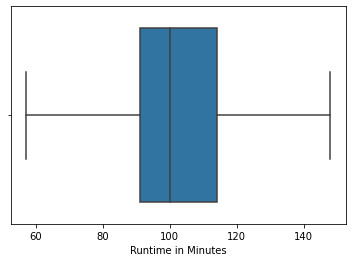

In [21]:
# Make a boxplot of the data
lst = list(runtime_series)
p = sns.boxplot(x=lst, showfliers=False)
p.set(xlabel = "Runtime in Minutes");

## Let's see the runtime average over time

In [22]:
df_rt_info =  df_rt_info.join(runtime_series, rsuffix=1)

In [23]:
year_runtime_ave = df_rt_info.groupby(['Year'])['runtime1'].mean()

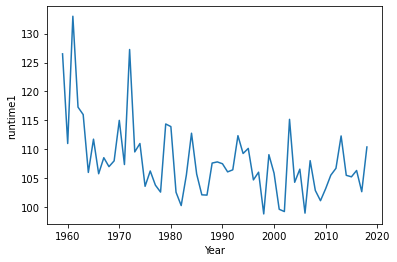

In [24]:
x = year_runtime_ave.index[-60:]
y = year_runtime_ave.iloc[-60:]

sns.lineplot(x=x, y=y);

## Inspecting the Publishers on the df_rt_review table

In [27]:
df_rt_review['id'].value_counts()

782     338
1067    275
1525    262
1777    260
1083    260
       ... 
28        1
102       1
348       1
476       1
1727      1
Name: id, Length: 1135, dtype: int64

In [28]:
# Seeing if there are any particular publishers that the studio should get acquainted with
top_20_publishers = df_rt_review['publisher'].value_counts()[0:20]
top_20_publishers

eFilmCritic.com               673
EmanuelLevy.Com               591
New York Times                590
Washington Post               565
Entertainment Weekly          541
Time Out                      540
Chicago Sun-Times             506
Variety                       497
Austin Chronicle              484
Filmcritic.com                470
rec.arts.movies.reviews       441
Film Threat                   436
TV Guide                      415
Ozus' World Movie Reviews     413
Los Angeles Times             379
Empire Magazine               371
San Francisco Chronicle       358
Reeling Reviews               358
Film Journal International    354
Arkansas Democrat-Gazette     349
Name: publisher, dtype: int64

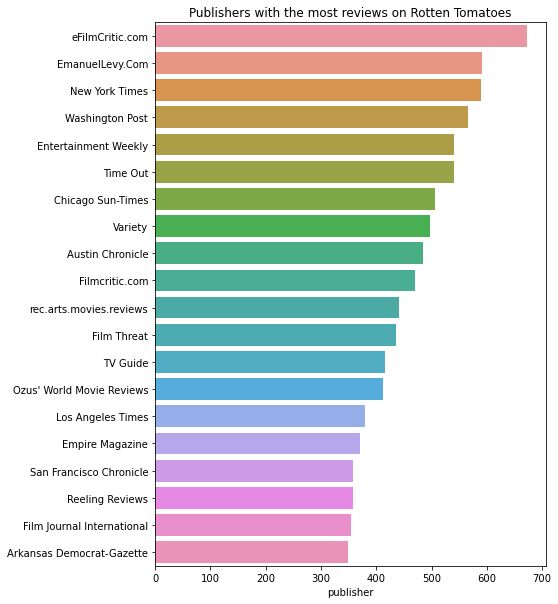

In [29]:
fig, ax = plt.subplots(figsize=(7,10))

sns.barplot(x=top_20_publishers, y=top_20_publishers.index, orient='h')
ax.set_title('Publishers with the most reviews on Rotten Tomatoes');

## Thoughts

I don't think there are any extremely insightful findings from the first exploration through the data.

#### The takeaways.

1) Films should stick to being around 1 to 2 hours
2) Average runtime seems to be a bit shorter in recent years, but not too significant.
3) The movie studio marketing team should get acquainted with the top 20 publishers to ensure good online reputation of future releases.

---
## Other Work in Progess
### Finding any significance with the rotten vs fresh reviews.

In [ ]:
fresh_df = df_rt_review[df_rt_review['fresh'] == 'fresh']
fresh_df = fresh_df.groupby(['id']).count()
fresh_df = fresh_df.rename(columns={'fresh': 'fresh_counts'})

In [ ]:
rotten_df = df_rt_review[df_rt_review['fresh'] == 'rotten']
rotten_df = rotten_df.groupby(['id']).count()
rotten_df = rotten_df.rename(columns={'fresh': 'rotten_counts'})

In [ ]:
# df_rt_review.join(rotten_counts)
rotten_fresh_df = rotten_df.join(fresh_df, lsuffix=1)
rotten_fresh_df = rotten_fresh_df.loc[:, ['rotten_counts', 'fresh_counts']]
rotten_fresh_df['percentage_rotten'] = rotten_fresh_df['rotten_counts'] / (rotten_fresh_df['rotten_counts'] \
                                        + rotten_fresh_df['fresh_counts'])
           
rotten_fresh_df['percentage_fresh'] = rotten_fresh_df['fresh_counts'] / (rotten_fresh_df['rotten_counts'] \
                                        + rotten_fresh_df['fresh_counts'])

In [ ]:
rotten_fresh_df